### Programation d'un neurone artificiel

#### Import des librarys

In [37]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

#### Initialisation du dataset

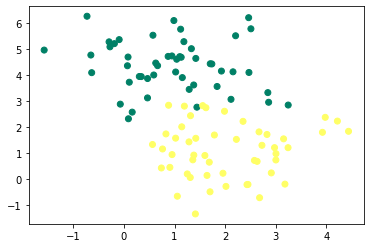

In [5]:
X, y = make_blobs(n_samples = 100, n_features=2,centers=2,random_state=0)
y = y.reshape((y.shape[0],1))

plt.scatter(X[:,0],X[:,1], c = y, cmap="summer")
plt.show()

#### Fonction d'initialisation

In [6]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

#### Model

In [11]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1/(1+ np.exp(-Z))
    return A

#### Fonction coût/Log Loss

In [8]:
def log_loss(A,y):
    return (1/len(y))*np.sum(-y*np.log(A) - (1 - y)* np.log(1-A))

#### Gradients

In [9]:
def gradients(A,X,y):
    dW = (1/len(y))*np.dot(X.T, A - y)
    db = (1/len(y))* np.sum( A - y)
    return (dW, db)

#### Update des poids

In [10]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W,b)

#### Fonction de prediction

In [73]:
def predict(X,W,b):
    A = model(X,W,b)
    return A>=0.5

#### Algorithme de descente de gradient

In [86]:
def artificial_network(X,y,learning_rate=0.1,n_iter = 100):
    #initialisation des coefficients
    W, b = initialisation(X)
    Loss_history = []
    for i in range(n_iter):
        A = model(X,W,b)
        Loss_history.append(log_loss(A,y))
        dW,db = gradients(A,X,y)
        W, b = update(dW, db, W, b, learning_rate)
    y_pred = predict(X,W,b)
    print("score : ", accuracy_score(y,y_pred))

    #graphique
    fig, ax=plt.subplots(1,2,figsize=(18,6))
    #on trace la frontiere de décision
    x0 = np.linspace(-1,4,100)
    x1 = (-W[0]*x0-b)/W[1]
    ax[0].plot(x0,x1,c="orange",lw=3)
    ax[0].set_title("Frontiere de décision et dataset")
    #on regarde où est cette donnée sur le graphique
    ax[0].scatter(X[:,0],X[:,1],c = y, cmap="summer")
    ax[1].plot([i for i in range(len(Loss_history))], Loss_history)
    ax[1].set_title("Evolution du Loss")
    plt.show() # affiche la figure a l'ecran
    return W, b

#### Test

score :  0.86


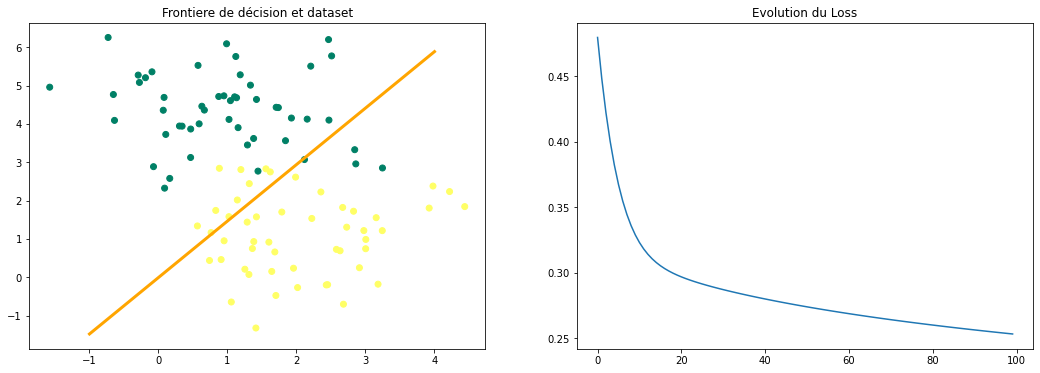

In [87]:
W,b = artificial_network(X,y,0.1,100)

#### Mise en production

probabilité du resultat à  [0.92825117]


array([ True])

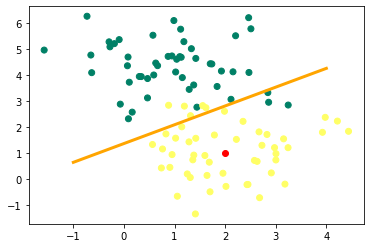

In [71]:
new_data = np.array([2,1])
#on trace la frontiere de décision
x0 = np.linspace(-1,4,100)
x1 = (-W[0]*x0-b)/W[1]
plt.plot(x0,x1,c="orange",lw=3)
#on regarde où est cette donnée sur le graphique
plt.scatter(X[:,0],X[:,1],c = y, cmap="summer")
plt.scatter(new_data[0],new_data[1],c = "red")
predict(new_data,W,b)